<a href="https://colab.research.google.com/github/vidhyagowda-232/TSF-GRIP-MAR-2023-Internship-Tasks/blob/main/Task1_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Sparks Foundation - GRIP - Data Science and Business Analytics - MAR'2023**

**TASK 1 : Prediction using supervised ML**

**Author : Vidhya Shree H**

**Dataset used: Student Scores**

*   It can be downloaded through the following link - http://bit.ly/w-data




**Problem Statement(s) :**

Predict the percentage of a student based on the no. of study hours.

What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Loading the dataset
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(url)

In [ ]:
df.head(11)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
X=df['Hours']
y=df['Scores']

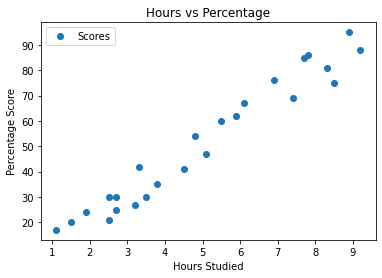

In [ ]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Dividing the data into input 'attributes' and output 'labels'

In [ ]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Splitting the data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=2)

Training the Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Simple Linear Regression:    Y=mX+c 

Multiple Linear Regression:  Y=m1X1+m2X2+m3X3+.....mnXn+c

In [ ]:
c=lr.intercept_
c

1.5079104828268939

In [ ]:
m=lr.coef_
m

array([9.94061514])

In [ ]:
#Plotting  the regression line
y_pred= m*X_train + c
y_pred

array([[28.34757137],
       [86.0031392 ],
       [26.35944834],
       [46.24067863],
       [39.28224803],
       [36.30006348],
       [78.05064708],
       [16.4188332 ],
       [75.06846254],
       [52.20504771],
       [33.31787894],
       [56.18129377],
       [49.22286317],
       [28.34757137],
       [62.14566286],
       [60.15753983],
       [79.0447086 ],
       [34.31194046],
       [89.97938526],
       [84.01501617]])

Text(0, 0.5, 'Scores')

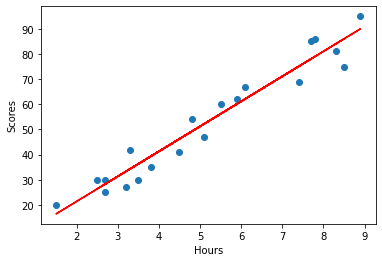

In [ ]:
#Checking whether we got the best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred, color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')

Testing the model

In [ ]:
y_pred_test=lr.predict(X_test)
y_pred_test

array([12.44258714, 26.35944834, 20.39507925, 92.9615698 , 70.09815497])

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


Text(0, 0.5, 'Scores')

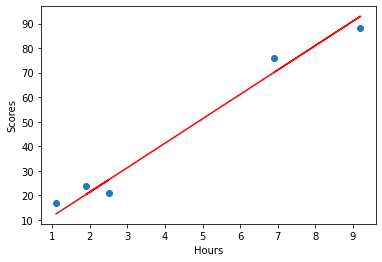

In [ ]:
#Checking whether we got the best fit line
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test, color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')

In [ ]:
#Comparing the actual and predicted values
df=pd.DataFrame({'Actual':y_test , 'Predicted':y_pred})
df

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


In [ ]:
#Testing against custom input
hours=[[9.25]]
my_pred=lr.predict(hours)
print('No. of Hours = {}'.format(hours))
print('Predicted Score = {}'.format(my_pred[0]))

No. of Hours = [[9.25]]
Predicted Score = 93.45860055685799


Evaluating the model

In [ ]:
from sklearn import metrics
error=metrics.mean_absolute_error(y_test,y_pred)
print('Mean absolute error:',error)

Mean absolute error: 4.877039354964476
